In [47]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson

In [48]:
def f(x):
    return 4 / (1 + x ** 2)

real_integral_val = np.pi
domain = (0, 1)
a, b = domain
width = b - a
m_vec = np.arange(1, 26)

In [49]:
def quad_int(fun, x_vec):
    s = 0
    for i in range(len(x_vec) - 1):
        dx = x_vec[i + 1] - x_vec[i]
        x = (x_vec[i] + x_vec[i + 1]) / 2
        s += fun(x) * dx
    return s

In [50]:
n_vec = 2**m_vec + 1
h_vec = width / n_vec

def calc_err(n, quadrature):
    x_vec = np.linspace(a, b, n, dtype=np.double)
    y_vec = f(x_vec)
    val_vec = quadrature(y_vec, x_vec)
    return np.abs(val_vec - real_integral_val) / real_integral_val

quad_err = np.array([calc_err(n, quad_int) for n in n_vec])
trap_err = np.array([calc_err(n, trapezoid) for n in n_vec])
simps_err = np.array([calc_err(n, simpson) for n in n_vec])

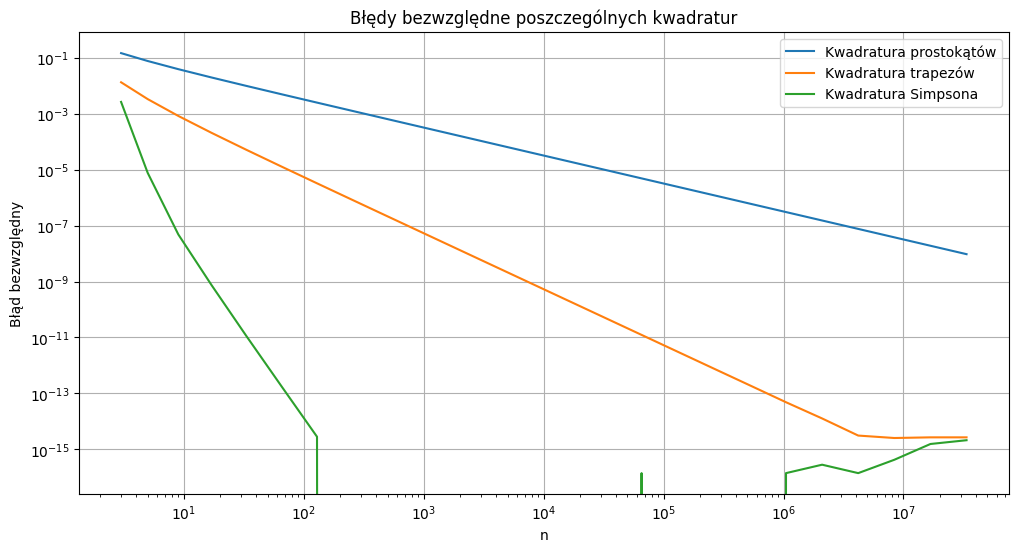

In [51]:
plt.figure(figsize=(12, 6))
plt.title("Błędy bezwzględne poszczególnych kwadratur")
plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
quad_n_min = 2**min((err, i) for i, err in enumerate(quad_err))[1] + 1
trap_n_min = 2**min((err, i) for i, err in enumerate(trap_err))[1] + 1
simps_n_min = 2**min((err, i) for i, err in enumerate(simps_err))[1] + 1
width = b - a
quad_h_min = width / quad_n_min
trap_h_min = width / trap_n_min
simps_h_min = width / simps_n_min
print(quad_h_min, trap_h_min, simps_h_min)
trap_err

5.960464122267716e-08 2.384185222581572e-07 0.007751937984496124


array([1.32393528e-02, 3.31557403e-03, 8.28929586e-04, 2.07232961e-04,
       5.18082491e-05, 1.29520624e-05, 3.23801561e-06, 8.09503902e-07,
       2.02375975e-07, 5.05939938e-08, 1.26484984e-08, 3.16212443e-09,
       7.90531248e-10, 1.97632741e-10, 4.94082914e-11, 1.23518608e-11,
       3.08796520e-12, 7.71955961e-13, 1.93660441e-13, 4.83444312e-14,
       1.27222187e-14, 3.10987569e-15, 2.54444375e-15, 2.68580173e-15,
       2.68580173e-15])

In [53]:
h_min_lab1 = 1e-8
h_min_lab1_teor = 9.1237e-9